# Dataframes 

# Visual Inspection

In [17]:
selected_channels = ['21']
selected_channels

['21']

Y-value for 21 at X=10.0: -3615


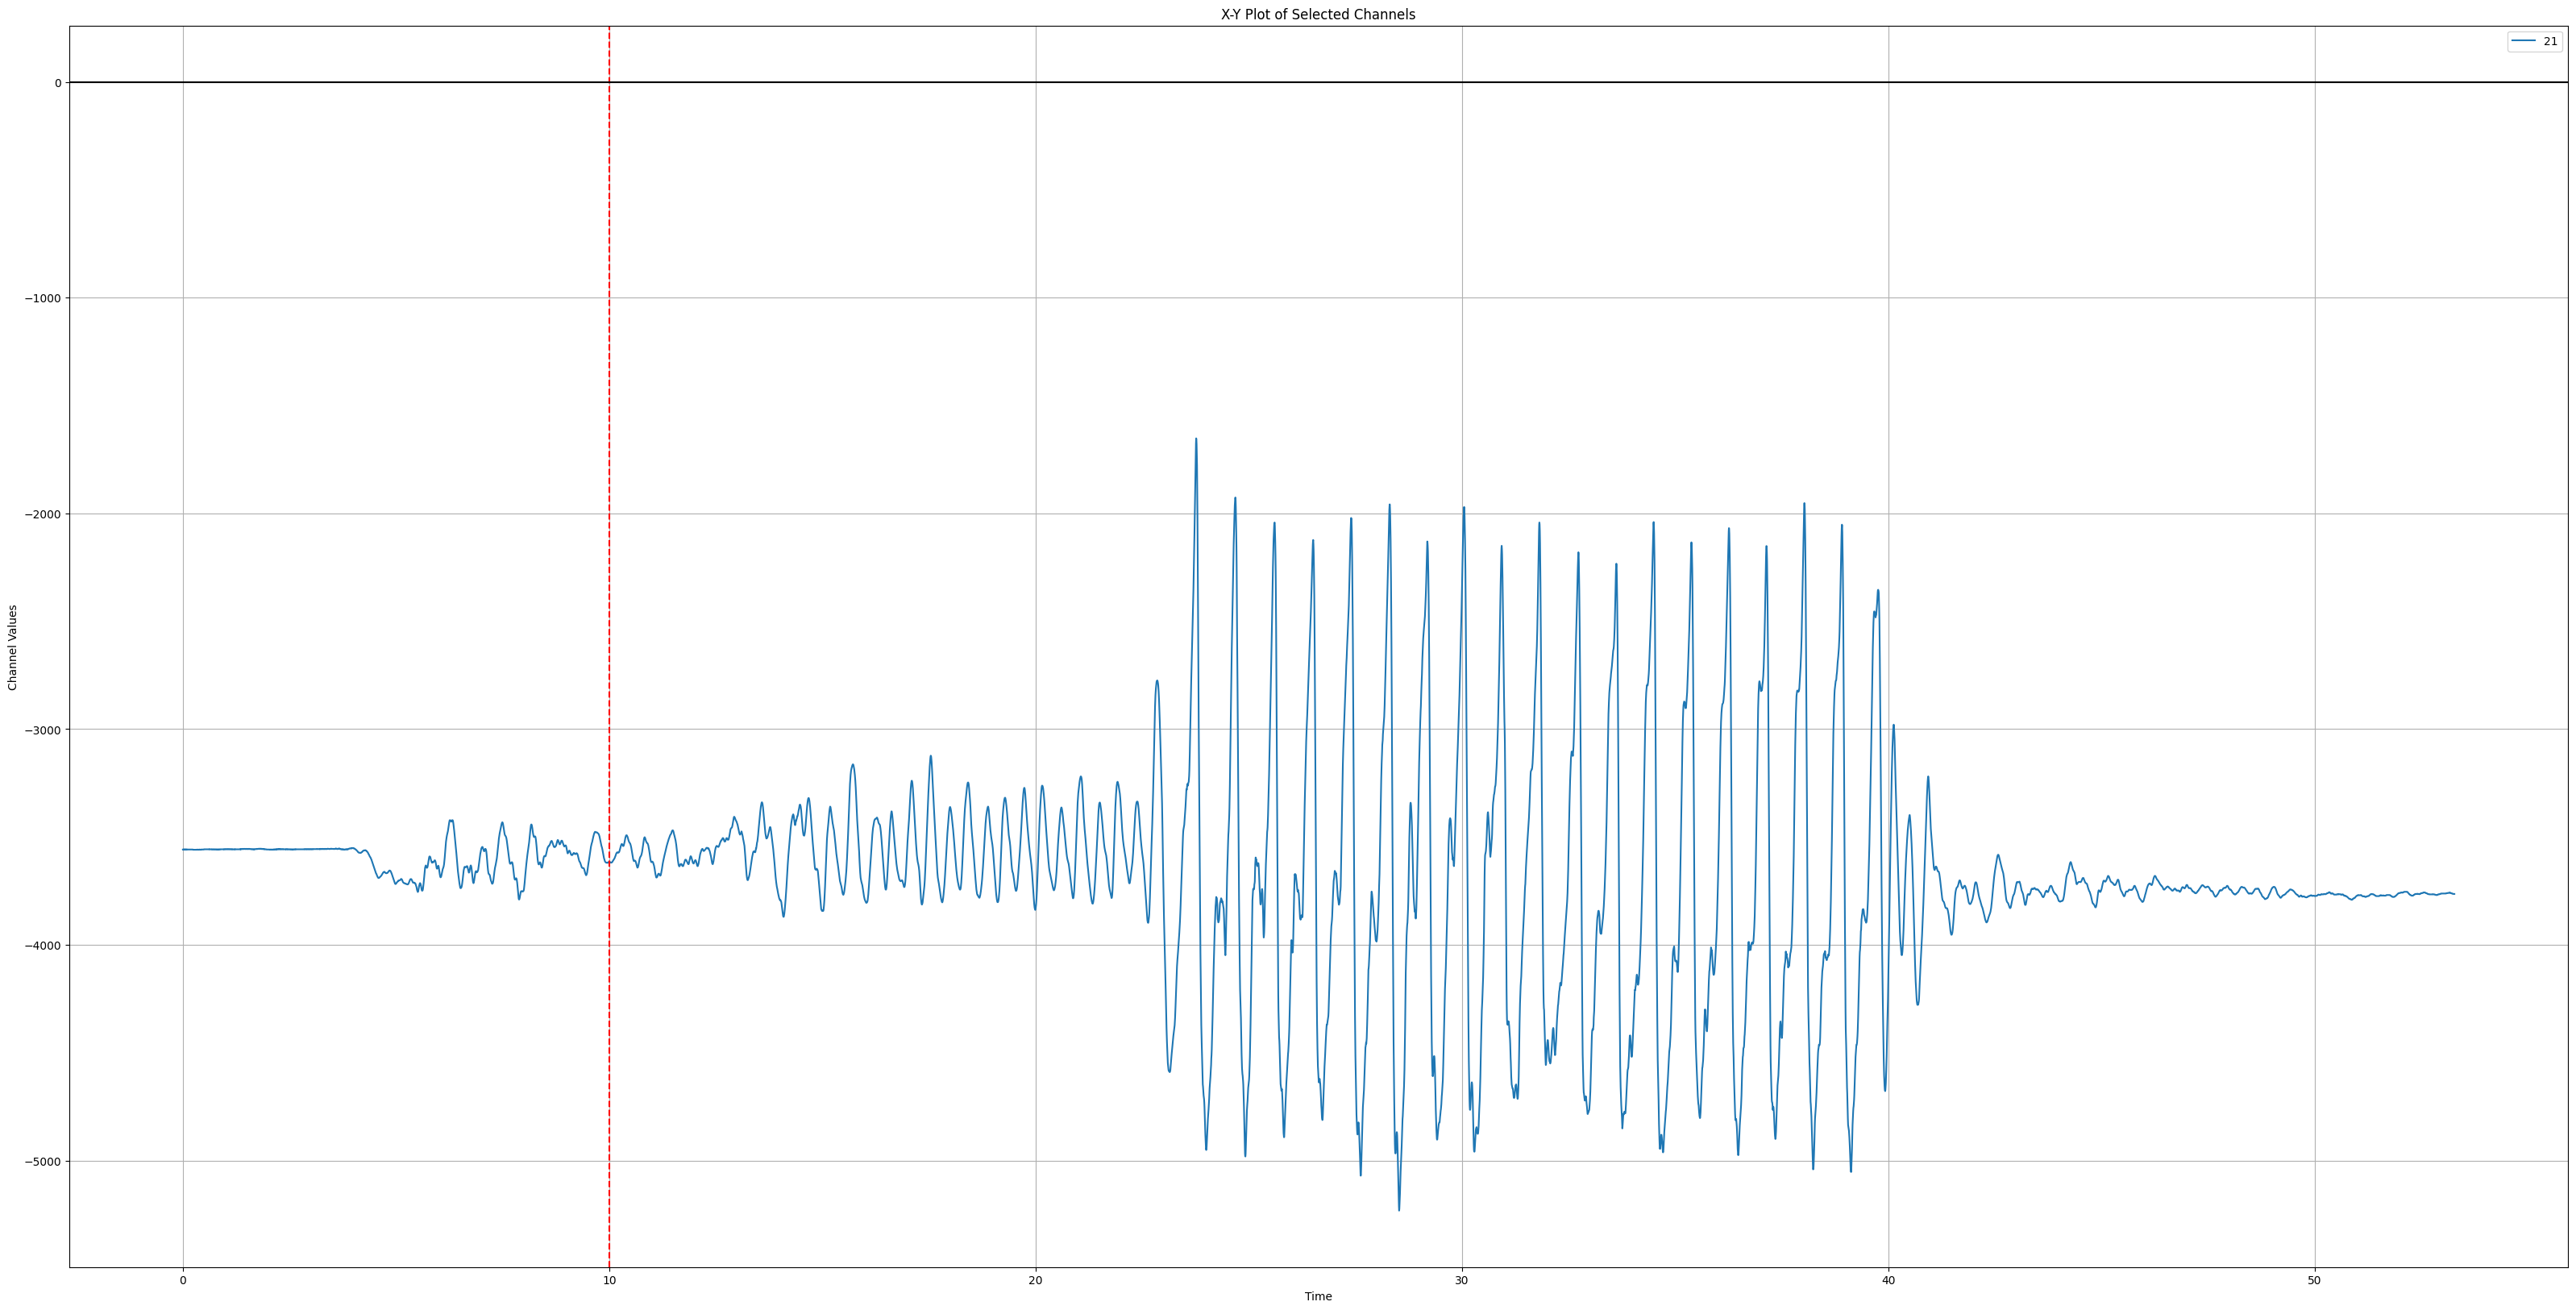

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Prompt the user to enter the name of the DataFrame to read
dataframe_name = input("Enter the name of the DataFrame to read: ")

# Check if the specified DataFrame exists in the global namespace
if dataframe_name in globals() and isinstance(globals()[dataframe_name], pd.DataFrame):
    # Read the specified DataFrame
    original_df = globals()[dataframe_name]

    # Create a new DataFrame by extracting data from row 1 in column with index 1
    new_df = pd.DataFrame(original_df.iloc[1:, 1])

    # Rename the column to "Time" if needed
    new_df.columns = ["Time"]

    # Add data values from selected channels to the new DataFrame, ensuring they are numeric
    for channel in selected_channels:
        if channel in original_df.columns:
            new_df[channel] = pd.to_numeric(original_df[channel].iloc[1:], errors='coerce')

    # Set the "Time" column as the index
    new_df.set_index("Time", inplace=True)

    # Check if there are any numeric columns to plot
    numeric_columns = new_df.select_dtypes(include=[float, int]).columns.tolist()

    if len(numeric_columns) > 0:
        # Create a subplot with the desired figure size
        fig, ax = plt.subplots(figsize=(40, 20))

        # Plot the data on the subplot
        new_df[numeric_columns].plot(ax=ax)

        # Add a grid to the plot
        ax.grid(True)

        # Prompt the user to enter a number for the vertical line
        vertical_line_number = float(input("Enter the x-value for the vertical line: "))

        # Add a vertical line at the specified x-value
        ax.axvline(x=vertical_line_number, color='r', linestyle='--')

        # Add a solid black line at y=0
        ax.axhline(y=0, color='k', linestyle='-')

        # Iterate through selected channels and print y-values for each
        for channel in selected_channels:
            if channel in numeric_columns:
                y_value = new_df.loc[vertical_line_number, channel]
                print(f"Y-value for {channel} at X={vertical_line_number}: {y_value}")

        ax.set_xlabel("Time")
        ax.set_ylabel("Channel Values")
        ax.set_title("X-Y Plot of Selected Channels")
        ax.legend()  # Show the legend with the vertical and horizontal line labels
        plt.show()
    else:
        print("No numeric data to plot in selected channels.")
else:
    print(f"DataFrame '{dataframe_name}' not found or not a valid DataFrame.")

# Correlation 

In [20]:

# Prompt user for the dataframe name
df_name = input("Enter the dataframe name: ")

# Assuming the dataframe is already assigned to a variable with the name provided by the user
df = globals()[df_name]
df = df.iloc[3: ] # To avoid reading the first row wich contains strings 


# Define the threshold for correlation
threshold = 0.6

# Compute the correlation matrix
corr_matrix = df.corr()

# Prompt the user to enter the column name; Naming should be SGXX
column_name = input("Enter the column name to compare correlations with the rest of the columns: ")

# Check if the entered column name is valid
if column_name not in corr_matrix.columns:
    print("Invalid column name!")
else:
    # Select the specific column for correlation analysis
    correlation_column = corr_matrix[column_name].drop(column_name)

    # Filter correlations above the threshold
    filtered_correlations = correlation_column[correlation_column.abs() > threshold]

    # Sort the correlations from highest to lowest
    sorted_correlations = filtered_correlations.sort_values(ascending=False)

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({'Column': sorted_correlations.index, 'Correlation': sorted_correlations.values})

    # Print the correlation results

result_df

,Column,Correlation
0,24,0.992191
1,22,0.988292
2,16,0.974799
3,46,0.964229
4,4,0.853684
5,44,0.832810
6,2,0.813134
7,Cyl,0.768515
8,43,0.744779
9,12,0.728182


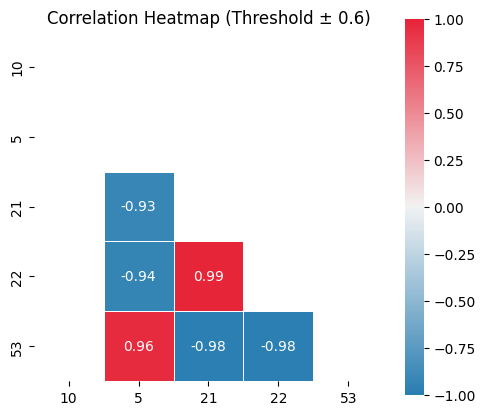

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prompt user for the dataframe name
df_name = input("Enter the dataframe name: ")

# Assuming the dataframe is already assigned to a variable with the name provided by the user
df = globals()[df_name]
df = df.iloc[3:]

# Prompt the user to enter the column names for the correlation heatmap
column_names = input("Enter the column names for the correlation heatmap (comma-separated, or 'ALL' for all columns): ")

# Prompt user for correlation threshold.
threshold = float(input("Enter the desired correlation threshold: "))

if column_names.upper() == "ALL":
    # Select all columns
    df_subset = df
else:
    # Convert input column names to a list
    selected_columns = [col.strip() for col in column_names.split(",")]

    # Select the specified columns by name
    df_subset = df[selected_columns]

# Compute the correlation matrix
corr_matrix = df_subset.corr()

# Create a mask for the upper triangle, for cleanliness purposes.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure; adaptive size
num_columns = len(df_subset.columns)
fig, ax = plt.subplots(figsize=(num_columns, num_columns))

# Apply the mask to hide the upper triangle
corr_matrix_masked = corr_matrix.mask(mask)

# Create a custom colormap
cmap = sns.diverging_palette(240, 10, s=90, l=50, as_cmap=True)

# Draw the heatmap with the bottom section of the matrix
sns.heatmap(corr_matrix_masked, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.8},
            mask=(np.abs(corr_matrix_masked) < threshold), ax=ax)

if column_names.upper() == "ALL":
    title = 'Correlation Heatmap (Threshold ± ' + str(threshold) + ')'
else:
    title = f'Correlation Heatmap (Threshold ± ' + str(threshold) + ')'

plt.title(title)
plt.tight_layout()
plt.show()


# Outlier Z Score 

In [25]:
import pandas as pd
from scipy.stats import zscore

# This would require more documentation on how to select threshold 

def identify_outliers(df, column_name, threshold=3):
    # Extract specified column from row 3 onward
    column_data = df[column_name][2:]
    
    # Convert column data to numeric (handles integers and floats)
    column_data = pd.to_numeric(column_data, errors='coerce')
    
    # Calculate Z-scores for the column data
    z_scores = zscore(column_data)
    
    # Identify outliers based on the threshold
    outliers = (abs(z_scores) > threshold)
    
    # Save outliers into a new DataFrame
    outliers_df = df.iloc[2:].loc[~column_data.isna()][outliers]
    
    return outliers_df

# Example usage
if __name__ == "__main__":
    # Read DataFrame name and column name from user input
    df_name = input("Enter the name of the DataFrame to be read: ")
    column_name = input("Enter the column name to identify outliers: ")

    # Validate column name input
    if column_name not in globals()[df_name].columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
    else:
        # Assuming the dataframe is already assigned to a variable with the name provided by the user
        df = globals()[df_name]
        df = df.iloc[3:]

        # Identify outliers using Z-score method
        outliers_df = identify_outliers(df, column_name)
        
        # Convert outlier_column to a DataFrame and sort it from greater to smaller values
        outlier_column = pd.DataFrame(outliers_df[column_name])

        # Ensure the column contains only numeric values
        outlier_column[column_name] = pd.to_numeric(outlier_column[column_name], errors='coerce')
        
        # Drop rows with NaN values after conversion to numeric
        outlier_column = outlier_column.dropna()

        # Sort the numeric column from greater to smaller values
        outlier_column = outlier_column.sort_values(by=column_name, ascending=False)

        # Display the sorted DataFrame containing outliers
        print("DataFrame containing outliers (sorted from greater to smaller values):")
      
outlier_column


DataFrame containing outliers (sorted from greater to smaller values):


,21
4754,-1652
4755,-1657
4753,-1675
4756,-1679
4757,-1720
...,...
5709,-5181
5708,-5202
5705,-5212
5707,-5224


# Outlier - Isolation Forest 


In [26]:
anomaly_inputs = run_09_14["24"].iloc[3:]
anomaly_inputs

3        -1676
4        -1676
5        -1676
6        -1676
7        -1675
         ...  
10652    -1822
10653    -1822
10654    -1822
10655    -1822
10656    -1822
Name: 24, Length: 10654, dtype: object

In [27]:
# Requieres inputs = 2 at lest. 
# Pending to see how to do it with one variable only.

anomaly_inputs = run_09_14["24"].iloc[3:].values.reshape(-1, 1)
anomaly_inputs

array([['-1676'],
       ['-1676'],
       ['-1676'],
       ...,
       [-1822],
       [-1822],
       [-1822]], dtype=object)

In [29]:
from sklearn.ensemble import IsolationForest
# Declre model object
# Contamination value to be investigated later 
# Randominzert to be investigated later. 
model_IF = IsolationForest(contamination=.005, random_state=42)

# Fit model with anomaly inputs (feeding the model)
model_IF.fit(anomaly_inputs)

IsolationForest(contamination=0.005, random_state=42)

In [30]:
# Generate new dataframe to store results from isolation forests. 
anomaly = pd.DataFrame()

# Desicion function to generate anomaly scores; pending to investigate what is this doing. 
anomaly["Anomaly Scores"] = model_IF.decision_function(anomaly_inputs)

# Classifier 1 = Inliner -1 = outlier
anomaly["anomaly"] = model_IF.predict(anomaly_inputs)
anomaly

,Anomaly Scores,anomaly
0,0.343037,1
1,0.343037,1
2,0.343037,1
3,0.343037,1
4,0.343285,1
...,...,...
10649,0.345717,1
10650,0.345717,1
10651,0.345717,1
10652,0.345717,1


In [31]:
# Understanding the presence or absence of outliers.
anomaly.describe()

,Anomaly Scores,anomaly
count,10654.000000,10654.000000
mean,0.264736,0.990238
std,0.091312,0.139391
min,-0.029780,-1.000000
25%,0.174907,1.000000
50%,0.313710,1.000000
75%,0.339778,1.000000
max,0.349185,1.000000


In [32]:
sorted_anomaly = anomaly.sort_values(by='Anomaly Scores', ascending=True)
sorted_anomaly

,Anomaly Scores,anomaly
5703,-0.029780,-1
5702,-0.029780,-1
5704,-0.029780,-1
5701,-0.029780,-1
5705,-0.029274,-1
...,...,...
10560,0.349185,1
9866,0.349185,1
8371,0.349185,1
10556,0.349185,1


In [33]:
row_4363 = run_09_14["24"].iloc[5703]
row_4363


# El pico mas grande esta en realidad en -3811
# Esto me da entender qeu esta funcionando a medias porque no me está detectado el pico mas alto! Porque? 

'-3144'

# Visual Descriptive Statistics 

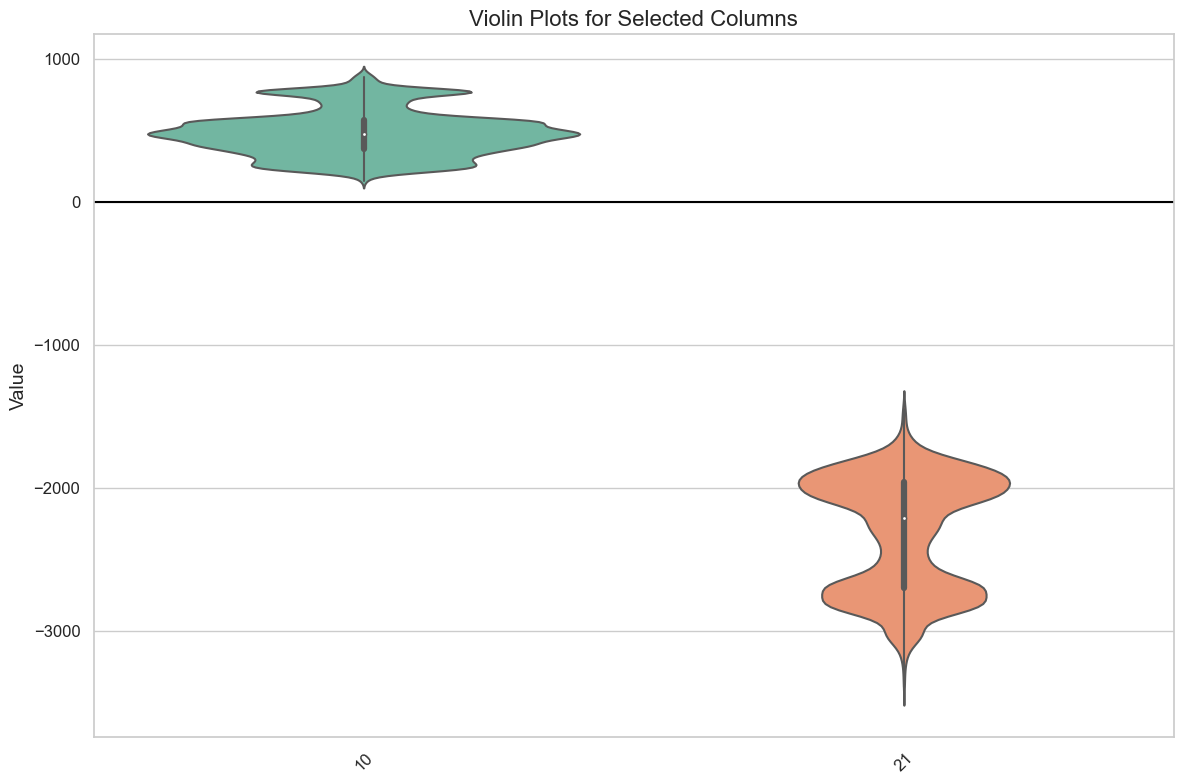

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a visually appealing style for the plots
sns.set(style="whitegrid")

# Prompt user for the dataframe name
df_name = input("Enter the dataframe name: ")

# Assuming the dataframe is already assigned to a variable with the name provided by the user
df = globals()[df_name]

# Prompt user for selected channels (comma-separated)
selected_channels = input("Enter the column names you want to analyze (comma-separated), or type 'all' for all columns: ")

# Split the selected_channels input into a list
if selected_channels.strip().lower() == 'all':
    columns_to_analyze = df.columns
else:
    columns_to_analyze = [col.strip() for col in selected_channels.split(',')]

# Check if the provided columns are valid
invalid_columns = [col for col in columns_to_analyze if col not in df.columns]

if invalid_columns:
    print(f"Invalid column(s): {', '.join(invalid_columns)}")
else:
    # Create a new DataFrame with skipped rows and selected columns
    selected_df = df.iloc[2:, :][columns_to_analyze]
    
    # Convert all string values to float
    selected_df = selected_df.applymap(lambda x: float(x) if isinstance(x, str) else x)
    
    # Calculate descriptive statistics
    stats = selected_df.describe(include='all')
    
    # Customize aesthetics for the violin plot
    sns.set_palette("Set2")  # Change color palette
    plt.figure(figsize=(12, 8))
    
    # Create a single violin plot with multiple violins for selected columns
    sns.violinplot(data=selected_df, orient='v', inner="box", palette="Set2")
    
    # Add a solid horizontal line at y=0
    plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
    
    plt.title('Violin Plots for Selected Columns', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Value', fontsize=14)
    
    plt.tight_layout()
    plt.show()


# Max Mins 

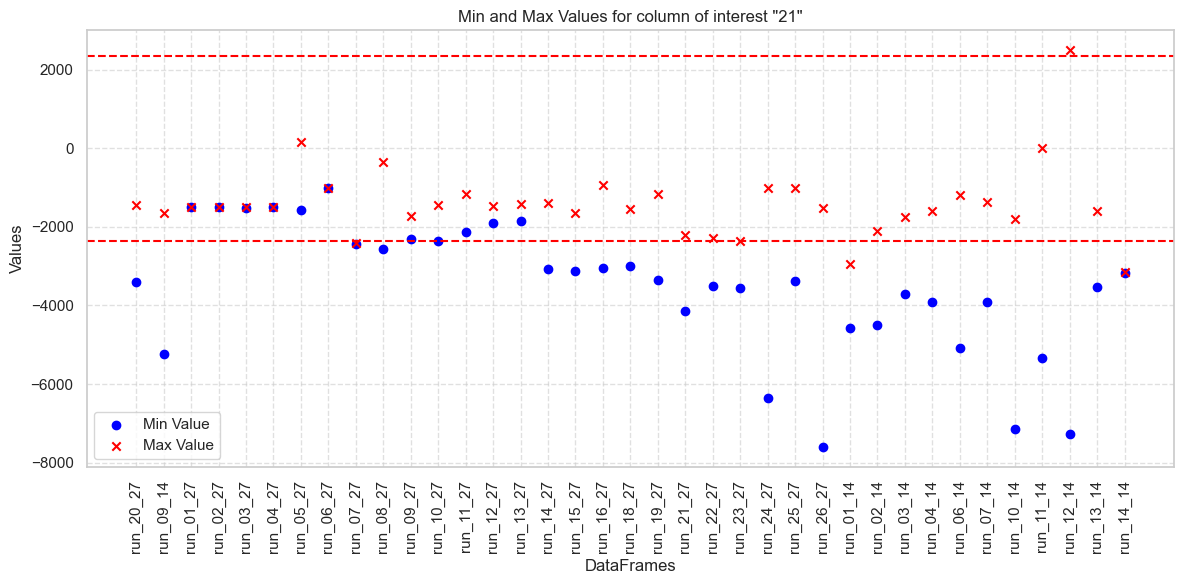

In [38]:
import pandas as pd
import copy
import matplotlib.pyplot as plt

# Function to calculate min and max values for a specified column in a dataframe
def calculate_min_max(df, column_name):
    if column_name in df.columns:
        # Filter out non-numeric values and calculate min and max
        numeric_values = pd.to_numeric(df[column_name], errors='coerce')
        min_value = numeric_values.min()
        max_value = numeric_values.max()
        return min_value, max_value
    else:
        return None, None

# Prompt the user to enter the column name
column_name = input("Enter the name of the column: ")

# Lists to store the results for each dataframe
dataframe_names = []
min_values = []
max_values = []

# Create a copy of the globals dictionary for iteration
global_vars = copy.copy(globals())

# Iterate through the copy of global variables to find dataframes containing "run" in their names
for var_name, var_value in global_vars.items():
    if "run" in var_name.lower() and isinstance(var_value, pd.DataFrame):
        min_val, max_val = calculate_min_max(var_value, column_name)
        if min_val is not None:
            dataframe_names.append(var_name)
            min_values.append(min_val)
            max_values.append(max_val)

# Create a DataFrame from the results
result_df = pd.DataFrame({
    'DataFrame': dataframe_names,
    'Min Value': min_values,
    'Max Value': max_values
})

# Visualize the DataFrame as a scatterplot
if not result_df.empty:
    plt.figure(figsize=(12, 6))  # Adjust the figure size
    plt.scatter(result_df['DataFrame'], result_df['Min Value'], label='Min Value', marker='o', color='blue')
    plt.scatter(result_df['DataFrame'], result_df['Max Value'], label='Max Value', marker='x', color='red')
    plt.axhline(y=2350, color='red', linestyle='--')  # Add the red dotted line
    plt.axhline(y=-2350, color='red', linestyle='--')  # Add the red dotted line
    plt.xlabel('DataFrames')
    plt.ylabel('Values')
    plt.title('Min and Max Values for column of interest "{}"'.format(column_name))
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines
    
    # Annotate data values
   # for i, row in result_df.iterrows():
       # plt.annotate(f'{row["Min Value"]}', (row["DataFrame"], row["Min Value"] + 50))
       # plt.annotate(f'{row["Max Value"]}', (row["DataFrame"], row["Max Value"] + 50))

    plt.show()
else:
    print("\nNo valid DataFrame found with the specified column.")


# SARIMA AND ARIMA 